<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture05/notebooks/Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from skimage.transform import resize

In [ ]:
def create_small_digit(image, scale=0.3):
    return resize(image, (int(image.shape[0] * scale), int(image.shape[1] * scale)), anti_aliasing=True)

def create_blank_image_with_small_digit(small_digit, original_size=(28, 28)):
    # Create a blank image (all zeros)
    blank_image = np.zeros(original_size)

    # Determine the size of the small digit
    s_h, s_w = small_digit.shape

    # Place the small digit in the top-left corner of the blank image
    blank_image[:s_h, :s_w] = small_digit * 255  # Scale to match the original MNIST intensity

    return blank_image

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


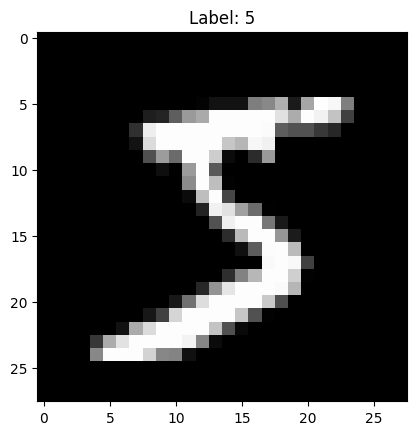

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display an example image
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

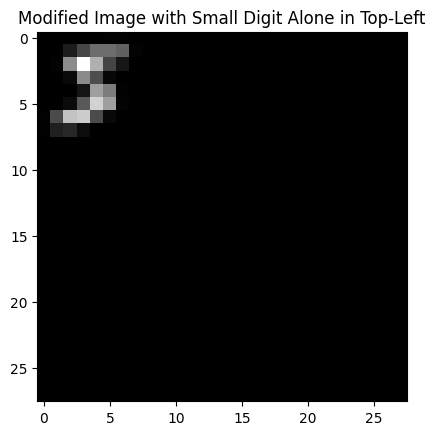

In [ ]:
# Apply this to create the modified image
modified_image = create_blank_image_with_small_digit(small_digit)

plt.imshow(modified_image, cmap='gray')
plt.title('Modified Image with Small Digit Alone in Top-Left')
plt.show()

In [ ]:
X = modified_image/255
W = small_digit/255

In [ ]:
def conv2d(image, kernel, stride=1, padding=0):
    """
    Perform a 2D convolution operation on an image using the specified kernel.

    Parameters:
    - image: 2D numpy array, the input image.
    - kernel: 2D numpy array, the convolution kernel (filter).
    - stride: int, the stride of the convolution. Default is 1.
    - padding: int, the amount of zero-padding around the image. Default is 0.

    Returns:
    - output: 2D numpy array, the result of applying the convolution.
    """

    # Add zero-padding to the image if required
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Get the dimensions of the image and the kernel
    i_h, i_w = image.shape
    k_h, k_w = kernel.shape

    # Calculate the dimensions of the output
    o_h = (i_h - k_h) // stride + 1
    o_w = (i_w - k_w) // stride + 1

    # Initialize the output image
    output = np.zeros((o_h, o_w))

    # Perform the convolution
    for y in range(0, o_h):
        for x in range(0, o_w):
            # Extract the region of interest
            region = image[y * stride:y * stride + k_h, x * stride:x * stride + k_w]

            # Element-wise multiplication and summation
            output[y, x] = np.sum(region * kernel)

    return output

In [ ]:
Z = conv2d(X, W)

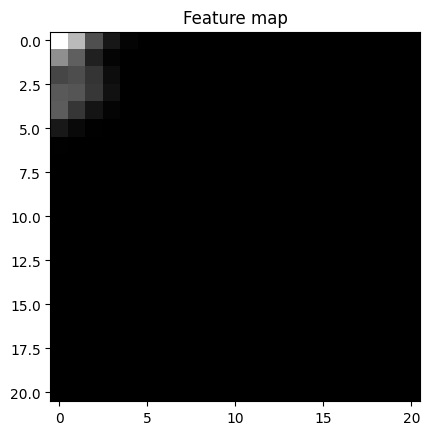

In [ ]:
plt.imshow(Z, cmap='gray')
plt.title('Feature map')
plt.show()